<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/Object_Recognition_using_RESNET50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install kaggle

In [4]:
#configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
#data set api
!kaggle competitions download -c cifar-10

100% 713M/715M [00:35<00:00, 24.2MB/s]
100% 715M/715M [00:35<00:00, 21.2MB/s]


In [6]:
from zipfile import ZipFile
dataset='/content/cifar-10.zip'
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [7]:
!ls

cifar-10.zip  kaggle.json  sample_data	sampleSubmission.csv  test.7z  train.7z  trainLabels.csv


In [8]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.6/67.6 kB 3.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 413.8/413.8 kB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.9/138.9 kB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 56.5 MB/s eta 0:00:00


In [9]:
import py7zr

archive=py7zr.SevenZipFile('/content/train.7z',mode='r')
archive.extractall()
archive.close()

In [10]:
!ls

cifar-10.zip  sample_data	    test.7z  train.7z
kaggle.json   sampleSubmission.csv  train    trainLabels.csv


Importing the dependencies

In [11]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

In [12]:
filename=os.listdir('/content/train')

In [13]:
type(filename)

list

In [14]:
len(filename)

50000

In [16]:
print(filename[0:5])
print(filename[-5:])

['41047.png', '12670.png', '2883.png', '9376.png', '5117.png']
['10140.png', '2653.png', '26553.png', '6090.png', '32814.png']


Labels Processing

In [17]:
labels_df=pd.read_csv('/content/trainLabels.csv')

In [18]:
labels_df.shape

(50000, 2)

In [19]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [20]:
labels_df[labels_df['id']==7796]

,id,label
7795,7796,frog


In [21]:
labels_df.tail()

,id,label
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile
49999,50000,automobile


In [23]:
labels_df['label'].value_counts()

label
frog          5000
truck         5000
deer          5000
automobile    5000
bird          5000
horse         5000
ship          5000
cat           5000
dog           5000
airplane      5000
Name: count, dtype: int64

In [24]:
labels_dictionary={'airplane':0,'automobile':1,'bird':2,'cat':3,'deer':4,'dog':5,'frog':6,'horse':7,'ship':8,'truck':9}
labels=[labels_dictionary[i] for i in labels_df['label']]

In [25]:
print(labels[0:5])
print(labels[-5:])

[6, 9, 9, 4, 1]
[2, 6, 9, 1, 1]


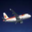

In [29]:
#displaying sample image
import cv2
from google.colab.patches import cv2_imshow
img=cv2.imread('/content/train/7345.png')
cv2_imshow(img)

In [30]:
labels_df.head()

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile


In [31]:
id_list=list(labels_df['id'])

In [32]:
print(id_list[0:5])
print(id_list[-5:])

[1, 2, 3, 4, 5]
[49996, 49997, 49998, 49999, 50000]


Image Processing

In [34]:
#convert images to numpy array

train_data_folder='/content/train/'
data=[]
for i in id_list:
  img=Image.open(train_data_folder+str(i)+'.png')
  img=np.array(img)
  data.append(img)

In [35]:
type(data)

list

In [37]:
len(data)

50000

In [38]:
type(data[0])

numpy.ndarray

In [40]:
data[0].shape

(32, 32, 3)

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]], dtype=uint8)
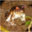

In [41]:
data[0]

In [42]:
#convert images and labels to numpy arrays

In [43]:
X=np.array(data)
Y=np.array(labels)

In [44]:
type(X)

numpy.ndarray

In [45]:
print(X.shape,Y.shape)

(50000, 32, 32, 3) (50000,)


Train test split

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [47]:
print(X.shape,X_train.shape,X_test.shape)

(50000, 32, 32, 3) (40000, 32, 32, 3) (10000, 32, 32, 3)


In [48]:
#scaling the data
X_train_scaled=X_train/255
X_test_scaled=X_test/255

In [50]:
X_train_scaled[0]

array([[[0.81960784, 0.82352941, 0.79607843],
        [0.83529412, 0.83921569, 0.81960784],
        [0.85490196, 0.85882353, 0.84313725],
        ...,
        [0.49803922, 0.29019608, 0.15294118],
        [0.47843137, 0.26666667, 0.1372549 ],
        [0.45490196, 0.24705882, 0.1254902 ]],

       [[0.82352941, 0.82352941, 0.79215686],
        [0.83529412, 0.83921569, 0.81176471],
        [0.85490196, 0.8627451 , 0.83921569],
        ...,
        [0.48627451, 0.2745098 , 0.1372549 ],
        [0.4745098 , 0.2627451 , 0.12941176],
        [0.48235294, 0.27058824, 0.14117647]],

       [[0.80784314, 0.80392157, 0.76470588],
        [0.81960784, 0.81960784, 0.79215686],
        [0.83529412, 0.84313725, 0.81960784],
        ...,
        [0.48627451, 0.2745098 , 0.14509804],
        [0.51372549, 0.30196078, 0.16470588],
        [0.51372549, 0.30588235, 0.16078431]],

       ...,

       [[0.49803922, 0.42352941, 0.38039216],
        [0.54117647, 0.47843137, 0.43137255],
        [0.55294118, 0

Building a Neural Network

In [51]:
import tensorflow as tf
from tensorflow import keras

In [52]:
num_of_classes=10

#setting up layers of Neural Network

model=keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(64,activation='relu'),#rectified linear unit
    keras.layers.Dense(num_of_classes,activation='softmax')
])

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 64)                196672    
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 197322 (770.79 KB)
Trainable params: 197322 (770.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [55]:
#compile the neural network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
              )

In [57]:
#training the neural network
model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 [==============================] - 4s 3ms/step - loss: 1.9300 - acc: 0.2553 - val_loss: 1.9131 - val_acc: 0.2685
Epoch 2/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.9271 - acc: 0.2599 - val_loss: 1.9113 - val_acc: 0.2627
Epoch 3/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.9251 - acc: 0.2584 - val_loss: 1.9216 - val_acc: 0.2467
Epoch 4/10
1125/1125 [==============================] - 5s 5ms/step - loss: 1.9250 - acc: 0.2567 - val_loss: 1.9106 - val_acc: 0.2460
Epoch 5/10
1125/1125 [==============================] - 5s 4ms/step - loss: 1.9241 - acc: 0.2571 - val_loss: 1.9106 - val_acc: 0.2598
Epoch 6/10
1125/1125 [==============================] - 6s 5ms/step - loss: 1.9214 - acc: 0.2584 - val_loss: 1.9151 - val_acc: 0.2612
Epoch 7/10
1125/1125 [==============================] - 9s 8ms/step - loss: 1.9227 - acc: 0.2587 - val_loss: 1.9170 - val_acc: 0.2473
Epoch 8/10
1125/1125 [==============================] - 5s 4ms

In [65]:
#pre trained model for better accuracy
from tensorflow.keras import Sequential,models,layers
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras import optimizers

In [66]:
convolutional_base=ResNet50(weights='imagenet',include_top=False,input_shape=(256,256,3))
convolutional_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 256, 256, 3)]        0         []                            
                                                                                                  
 conv1_pad (ZeroPadding2D)   (None, 262, 262, 3)          0         ['input_2[0][0]']             
                                                                                                  
 conv1_conv (Conv2D)         (None, 128, 128, 64)         9472      ['conv1_pad[0][0]']           
                                                                                                  
 conv1_bn (BatchNormalizati  (None, 128, 128, 64)         256       ['conv1_conv[0][0]']          
 on)                                                                                       

In [67]:
model=models.Sequential()
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(layers.UpSampling2D((2,2)))
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.BatchNormalization())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64,activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.BatchNormalization())
model.add(layers.Dense(num_of_classes,activation='softmax'))

In [68]:
model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='sparse_categorical_crossentropy',
              metrics=['acc']
              )

In [70]:
history=model.fit(X_train_scaled,Y_train,validation_split=0.1,epochs=10)

Epoch 1/10
1125/1125 [==============================] - 426s 379ms/step - loss: 1.8684 - acc: 0.2983 - val_loss: 2.3895 - val_acc: 0.2830
Epoch 2/10
1125/1125 [==============================] - 433s 385ms/step - loss: 1.4529 - acc: 0.4759 - val_loss: 1.2435 - val_acc: 0.5695
Epoch 3/10
1125/1125 [==============================] - 427s 379ms/step - loss: 1.2277 - acc: 0.5720 - val_loss: 1.2768 - val_acc: 0.5523
Epoch 4/10
1125/1125 [==============================] - 433s 385ms/step - loss: 1.0831 - acc: 0.6254 - val_loss: 1.1177 - val_acc: 0.6135
Epoch 5/10
1125/1125 [==============================] - 427s 379ms/step - loss: 0.9896 - acc: 0.6685 - val_loss: 1.1283 - val_acc: 0.6363
Epoch 6/10
1125/1125 [==============================] - 434s 385ms/step - loss: 0.8989 - acc: 0.6996 - val_loss: 0.7843 - val_acc: 0.7290
Epoch 7/10
1125/1125 [==============================] - 435s 386ms/step - loss: 0.8164 - acc: 0.7277 - val_loss: 0.7787 - val_acc: 0.7318
Epoch 8/10
1125/1125 [============

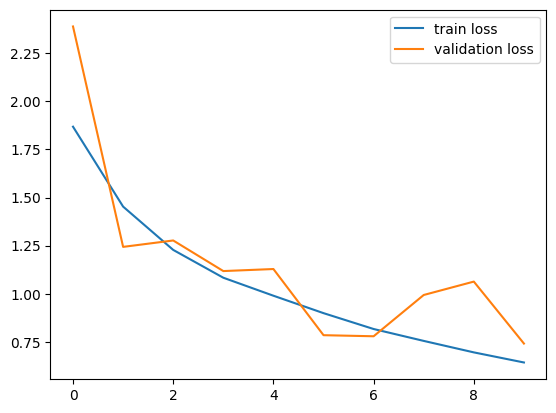

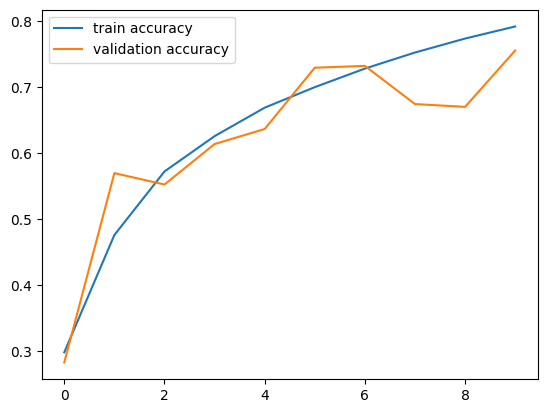

In [71]:
h=history

#plot the loss value
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

#plot the accuracy value
plt.plot(h.history['acc'],label='train accuracy')
plt.plot(h.history['val_acc'],label='validation accuracy')
plt.legend()
plt.show()